In [6]:
# Upload files
from google.colab import files
uploaded = files.upload()

# Load files
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

# Show data
train.head()


Saving train.csv to train (1).csv
Saving test.csv to test (1).csv
Saving gender_submission.csv to gender_submission (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Reload train dataset if needed
# import pandas as pd
# train = pd.read_csv('train.csv')

# Step 2: Handle Missing Values safely

# Fill missing 'Age' with median
train['Age'] = train['Age'].fillna(train['Age'].median())

# Fill missing 'Embarked' with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Only create 'HasCabin' if 'Cabin' column exists
if 'Cabin' in train.columns:
    train['HasCabin'] = train['Cabin'].notnull().astype(int)
    train = train.drop('Cabin', axis=1)  # drop original Cabin column
else:
    # If Cabin was already dropped, just create HasCabin as 0 for all
    train['HasCabin'] = 0

# Verify no missing values remain
print(train.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


In [10]:
# Step 3: Encode Categorical Variables

# 1. Convert 'Sex' column to numeric: male=0, female=1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# 2. Convert 'Embarked' into dummy variables (one-hot encoding)
#    drop_first=True avoids dummy variable trap
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

# 3. Drop unnecessary columns that won't help the model
train = train.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# 4. Check final dataset
print(train.head())
print(train.info())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  HasCabin  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500         0       False   
1         1       1    1  38.0      1      0  71.2833         0       False   
2         1       3    1  26.0      0      0   7.9250         0       False   
3         1       1    1  35.0      1      0  53.1000         0       False   
4         0       3    0  35.0      0      0   8.0500         0       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int6

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split features and target
X = train.drop('Survived', axis=1)
y = train['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



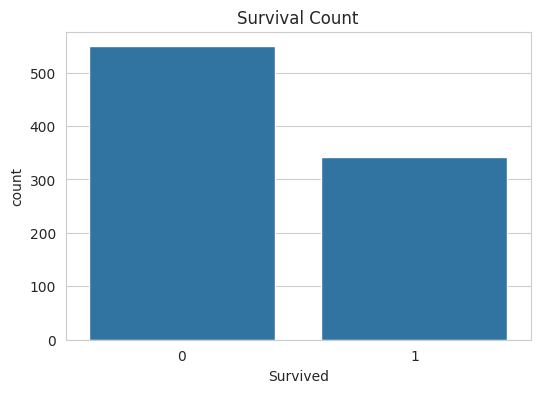

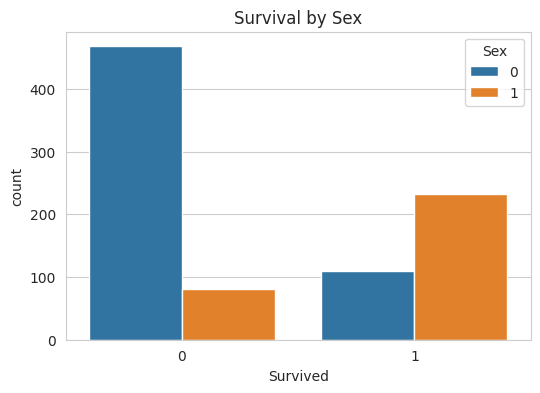

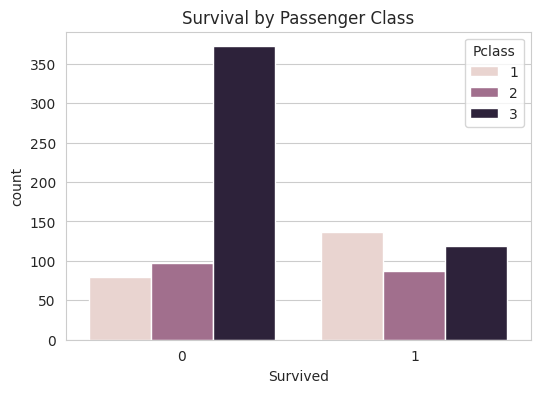

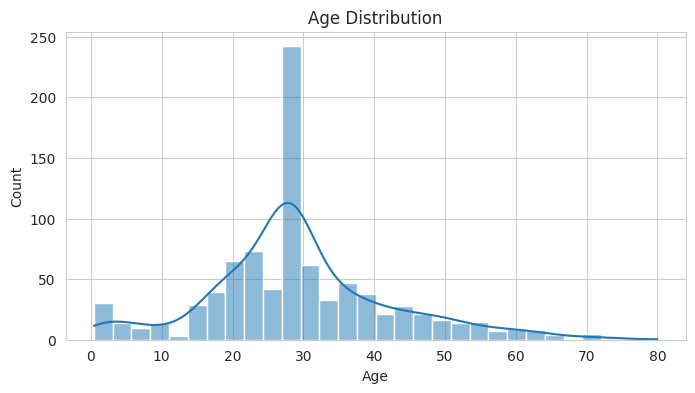

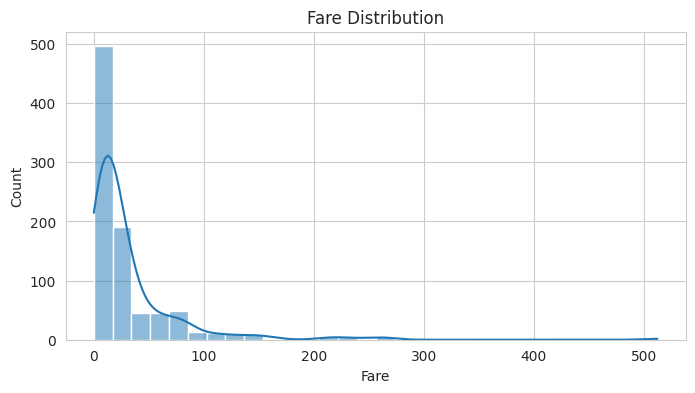

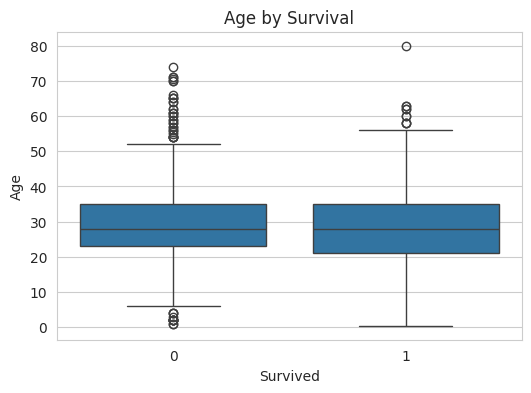

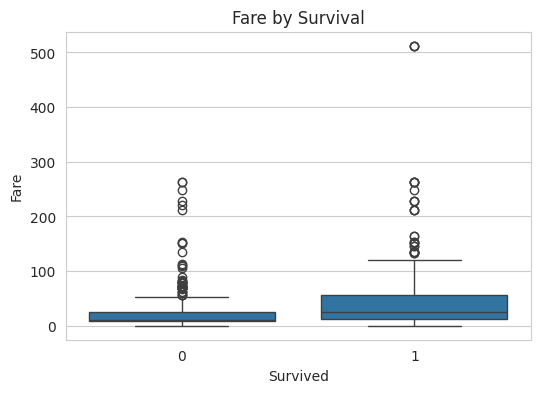

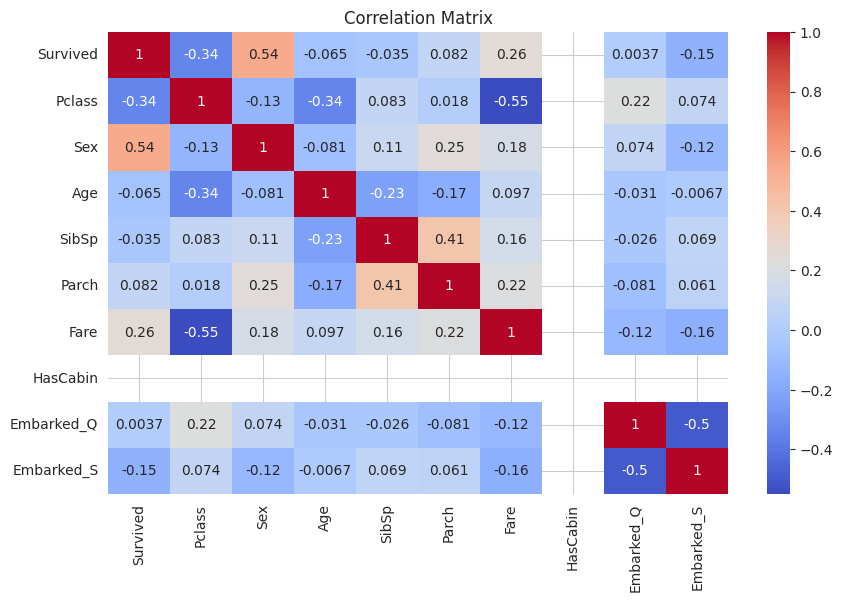


Survival rate by Sex and Pclass:
    Sex  Pclass  Survived
0    0       1  0.368852
1    0       2  0.157407
2    0       3  0.135447
3    1       1  0.968085
4    1       2  0.921053
5    1       3  0.500000


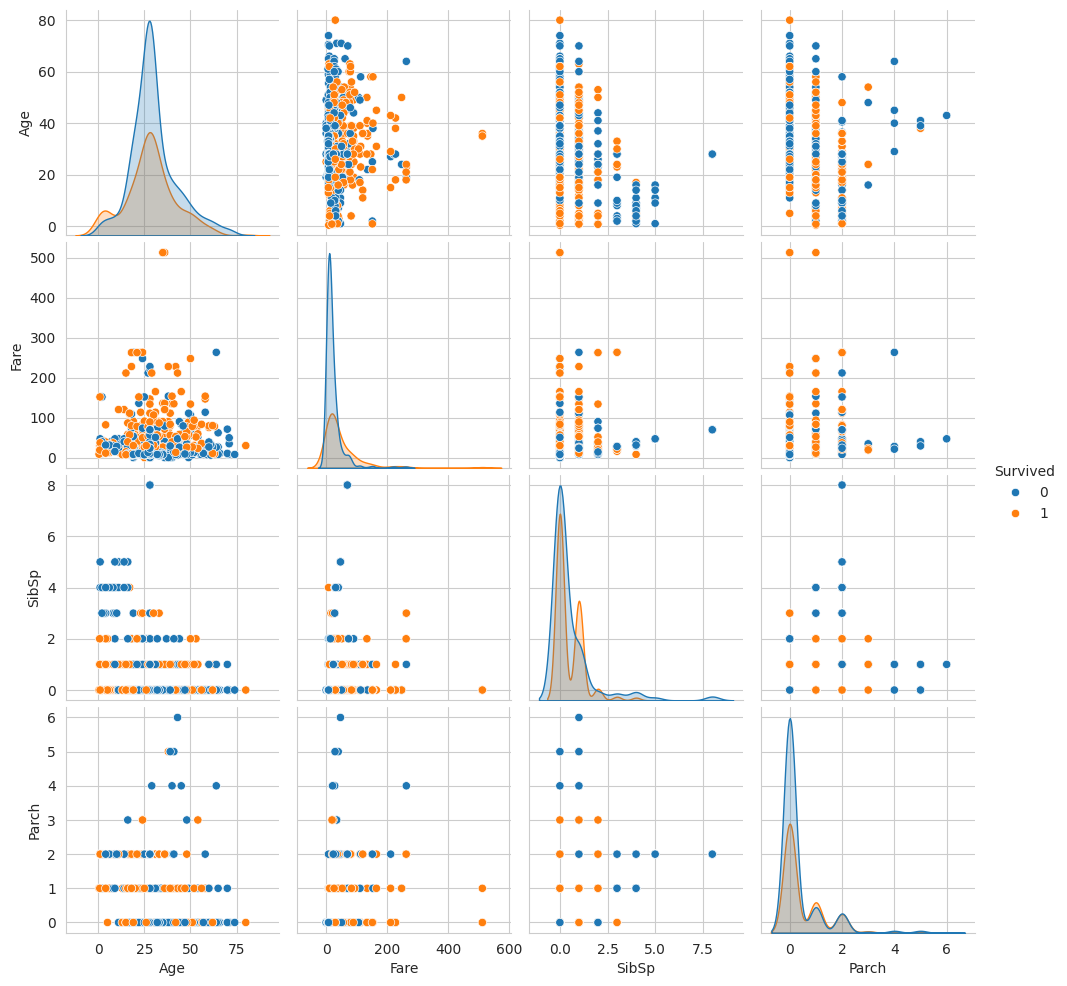

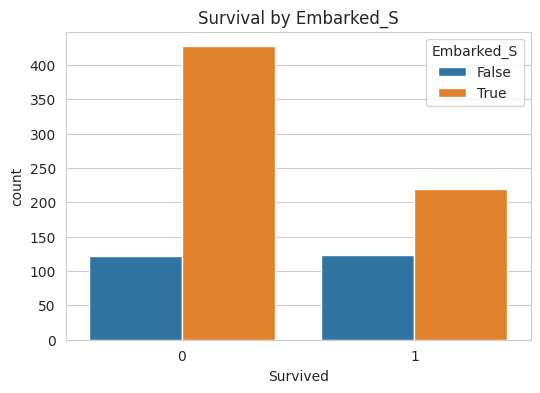

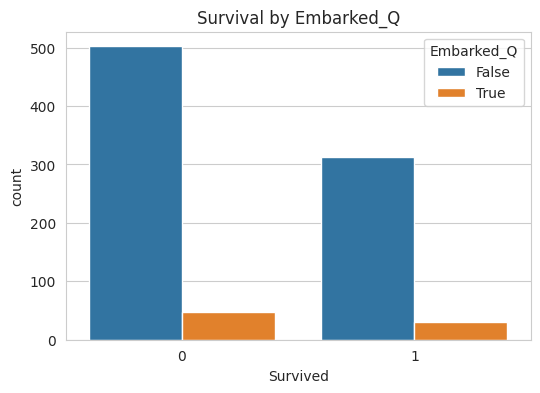

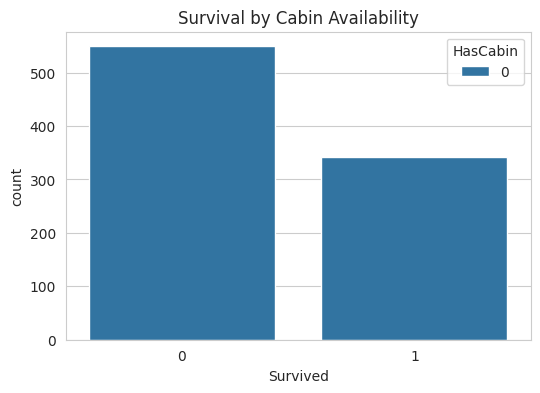

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from IPython.display import display

# 1. Count of Survived vs Not Survived
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
display(plt.gcf())
plt.close()

# 2. Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Sex')
display(plt.gcf())
plt.close()

# 3. Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Passenger Class')
display(plt.gcf())
plt.close()

# 4. Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
display(plt.gcf())
plt.close()

# 5. Fare Distribution
plt.figure(figsize=(8,4))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
display(plt.gcf())
plt.close()

# 6. Boxplot of Age by Survived
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age by Survival')
display(plt.gcf())
plt.close()

# 7. Boxplot of Fare by Survived
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare by Survival')
display(plt.gcf())
plt.close()

# 8. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
display(plt.gcf())
plt.close()

# 9. Survival rate by Sex and Pclass
grouped = train.groupby(['Sex','Pclass'])['Survived'].mean().reset_index()
print("\nSurvival rate by Sex and Pclass:\n", grouped)

# 10. Pairplot of numeric features
sns.pairplot(train[['Age','Fare','SibSp','Parch','Survived']], hue='Survived')
plt.show()  # pairplot automatically displays

# 11. Survival by Embarked_S
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Embarked_S', data=train)
plt.title('Survival by Embarked_S')
display(plt.gcf())
plt.close()

# 12. Survival by Embarked_Q
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Embarked_Q', data=train)
plt.title('Survival by Embarked_Q')
display(plt.gcf())
plt.close()

# 13. Survival by Cabin Availability
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='HasCabin', data=train)
plt.title('Survival by Cabin Availability')
display(plt.gcf())
plt.close()
